In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torchvision --upgrade

In [ ]:
!pip install timm


In [ ]:
!pip install transformers


Fold 1/10
----------
Epoch 1/10 - Train Loss: 0.3576 Train Acc: 0.8559 Train Precision: 0.8560 Train Recall: 0.8559 Train F1: 0.8559 - Val Loss: 0.2905 Val Acc: 0.9032 Val Precision: 0.9182 Val Recall: 0.9032 Val F1: 0.9034
Epoch 2/10 - Train Loss: 0.0905 Train Acc: 0.9686 Train Precision: 0.9687 Train Recall: 0.9686 Train F1: 0.9686 - Val Loss: 0.0722 Val Acc: 0.9749 Val Precision: 0.9751 Val Recall: 0.9749 Val F1: 0.9749
Epoch 3/10 - Train Loss: 0.0152 Train Acc: 0.9940 Train Precision: 0.9940 Train Recall: 0.9940 Train F1: 0.9940 - Val Loss: 0.0932 Val Acc: 0.9785 Val Precision: 0.9786 Val Recall: 0.9785 Val F1: 0.9785
Epoch 4/10 - Train Loss: 0.0116 Train Acc: 0.9964 Train Precision: 0.9964 Train Recall: 0.9964 Train F1: 0.9964 - Val Loss: 0.0040 Val Acc: 1.0000 Val Precision: 1.0000 Val Recall: 1.0000 Val F1: 1.0000
Epoch 5/10 - Train Loss: 0.0152 Train Acc: 0.9952 Train Precision: 0.9952 Train Recall: 0.9952 Train F1: 0.9952 - Val Loss: 0.1045 Val Acc: 0.9749 Val Precision: 0.974

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f88d835fd00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch 3/10 - Train Loss: 0.0412 Train Acc: 0.9877 Train Precision: 0.9877 Train Recall: 0.9877 Train F1: 0.9877 - Val Loss: 0.0268 Val Acc: 0.9892 Val Precision: 0.9895 Val Recall: 0.9892 Val F1: 0.9892
Epoch 4/10 - Train Loss: 0.0106 Train Acc: 0.9956 Train Precision: 0.9956 Train Recall: 0.9956 Train F1: 0.9956 - Val Loss: 0.0288 Val Acc: 0.9892 Val Precision: 0.9895 Val Recall: 0.9892 Val F1: 0.9892
Epoch 5/10 - Train Loss: 0.0047 Train Acc: 0.9984 Train Precision: 0.9984 Train Recall: 0.9984 Train F1: 0.9984 - Val Loss: 0.0674 Val Acc: 0.9821 Val Precision: 0.9827 Val Recall: 0.9821 Val F1: 0.9821
Epoch 6/10 - Train Loss: 0.0169 Train Acc: 0.9952 Train Precision: 0.9952 Train Recall: 0.9952 Train F1: 0.9952 - Val Loss: 0.0066 Val Acc: 1.0000 Val Precision: 1.0000 Val Recall: 1.0000 Val F1: 1.0000
Epoch 7/10 - Train Loss: 0.0009 Train Acc: 1.0000 Train Precision: 1.0000 Train Recall: 1.0000 Train F1: 1.0000 - Val Loss: 0.0002 Val Acc: 1.0000 Val Precision: 1.0000 Val Recall: 1.0000 

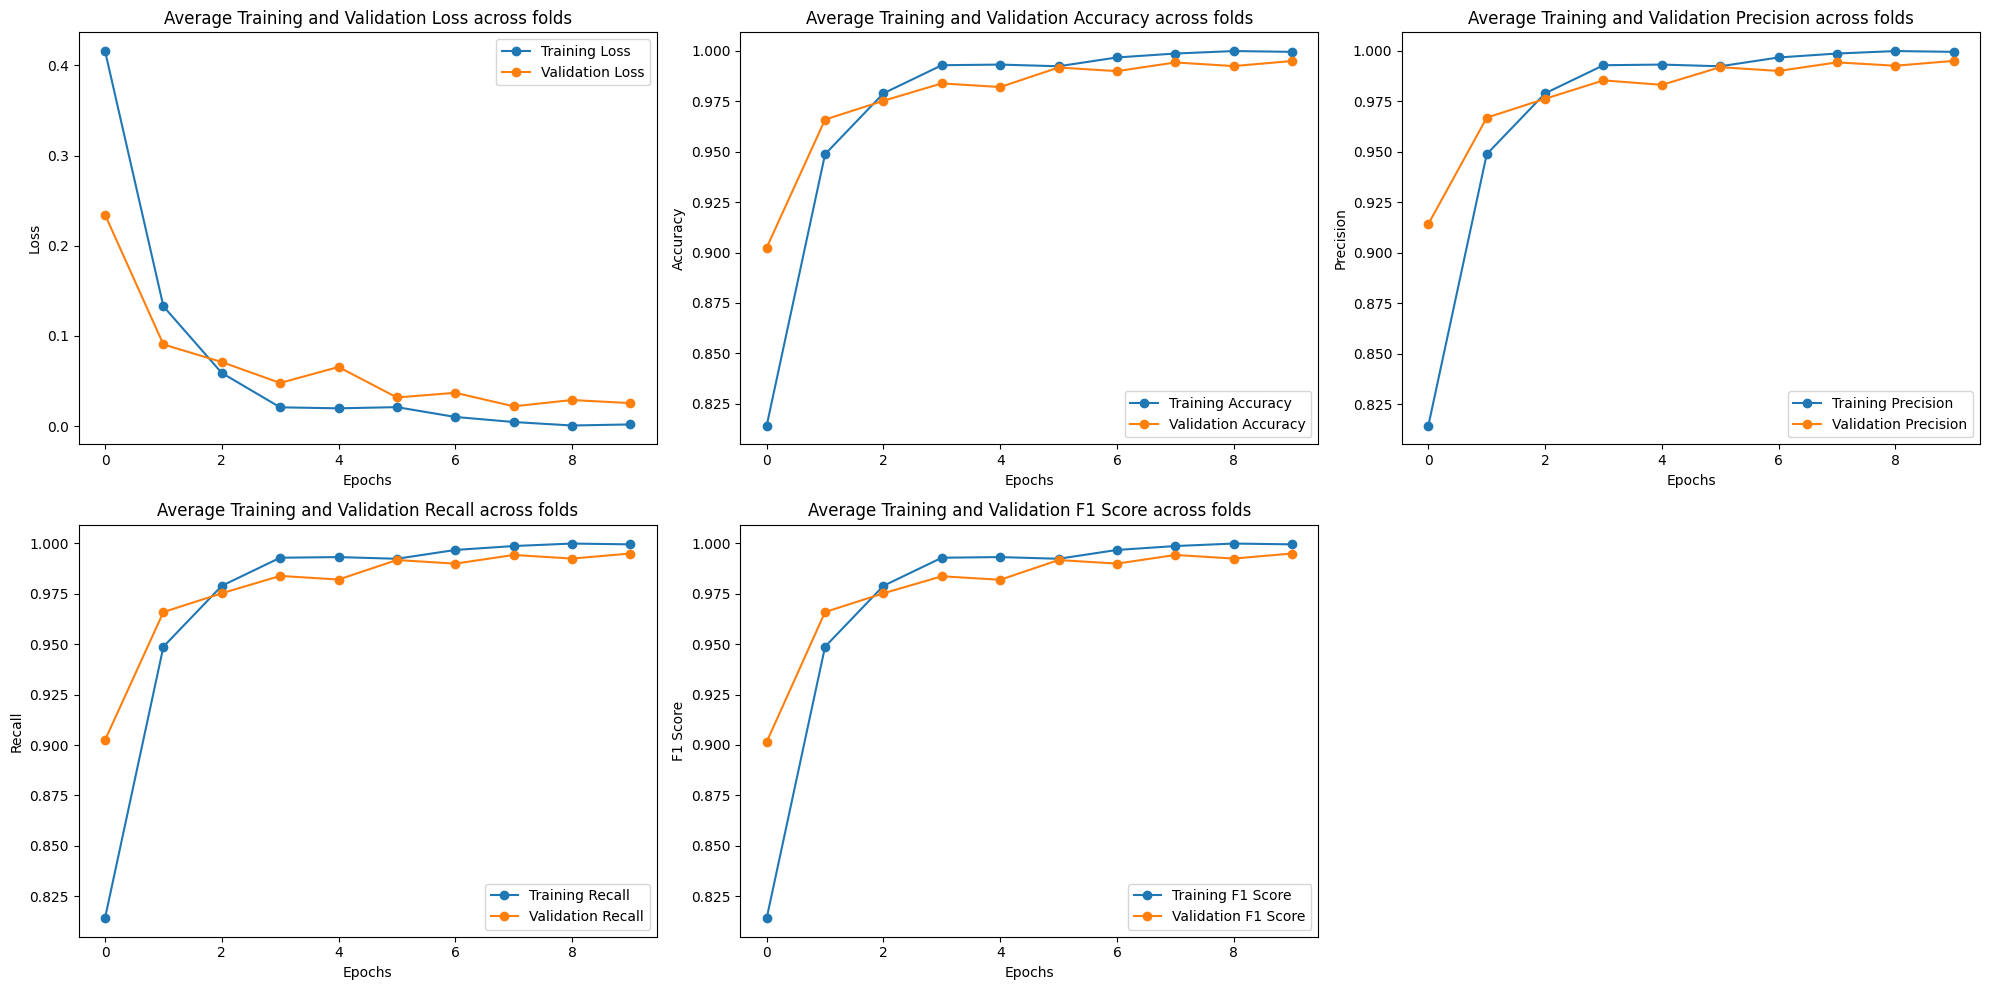

In [ ]:
# Importing necessary libraries and modules
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import datasets, transforms
import timm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Set the path to your dataset



# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transforms for training, validation, and testing data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


data_dir = '/content/drive/MyDrive/combined_dataset'

# Load the entire dataset
entire_dataset = datasets.ImageFolder(data_dir, transform=data_transforms['train'])

# Calculate sizes for training, validation, and test splits
train_size = int(0.7 * len(entire_dataset))
validation_size = (len(entire_dataset) - train_size) // 2
test_size = len(entire_dataset) - train_size - validation_size

# Perform the random split
train_dataset, validation_dataset, test_dataset = random_split(entire_dataset, [train_size, validation_size, test_size])

# Update the transforms for validation and test datasets
validation_dataset.dataset.transform = data_transforms['validation']
test_dataset.dataset.transform = data_transforms['test']






# Get the number of classes in the dataset
num_classes = len(entire_dataset.classes)


# Create the model

def create_model():
    model = timm.create_model('vit_base_patch16_224', pretrained=True)
    num_features = model.head.in_features
    model.head = nn.Sequential(
        nn.Dropout(0.5), # Add Dropout layer
        nn.Linear(num_features, num_classes)
    )
    return model.to(device)




# Define the loss function

criterion = nn.CrossEntropyLoss()



def compute_metrics(targets, predictions):
    precision, recall, f1, _ = precision_recall_fscore_support(targets, predictions, average='weighted')
    return precision, recall, f1

# Train the model with KFold cross-validation

def kfold_train_model(num_epochs=8, k=10):
    all_train_losses = []
    all_train_accuracies = []
    all_val_losses = []
    all_val_accuracies = []
    all_train_precisions = []
    all_train_recalls = []
    all_train_f1s = []
    all_val_precisions = []
    all_val_recalls = []
    all_val_f1s = []


    # Concatenate training and validation sets
    full_dataset = ConcatDataset([train_dataset.dataset, validation_dataset.dataset])


    # KFold cross-validation
    num_samples = len(full_dataset)
    indices = list(range(num_samples))
    fold_len = num_samples // k
    np.random.shuffle(indices)

    for fold in range(k):
        train_losses = []
        train_accuracies = []
        train_precisions=[]
        train_recalls=[]
        train_f1s=[]
        val_losses = []
        val_accuracies = []
        val_precisions=[]
        val_recalls=[]
        val_f1s=[]









        print(f"Fold {fold+1}/{k}")
        print('-' * 10)

        val_indices = indices[fold*fold_len: (fold+1)*fold_len]
        train_indices = [idx for idx in indices if idx not in val_indices]

        train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
        val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

        train_loader = DataLoader(full_dataset, batch_size=32, sampler=train_sampler, num_workers=1)
        val_loader = DataLoader(full_dataset, batch_size=32, sampler=val_sampler, num_workers=1)

        model = create_model()

        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min') # Learning rate scheduler



        for epoch in range(num_epochs):
            # Train
            model.train()
            running_loss = 0.0
            running_corrects = 0
            all_train_preds = []
            all_train_labels = []

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(True):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).item()
                all_train_preds.extend(preds.cpu().numpy())
                all_train_labels.extend(labels.cpu().numpy())

            train_loss = running_loss / len(train_loader.sampler)
            train_acc = running_corrects / len(train_loader.sampler)
            train_precision, train_recall, train_f1 = compute_metrics(all_train_labels, all_train_preds)

            train_losses.append(train_loss)
            train_accuracies.append(train_acc)
            train_precisions.append(train_precision)
            train_recalls.append(train_recall)
            train_f1s.append(train_f1)

            # Validation
            model.eval()
            running_loss = 0.0
            running_corrects = 0
            all_val_preds = []
            all_val_labels = []

            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                with torch.set_grad_enabled(False):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).item()
                all_val_preds.extend(preds.cpu().numpy())
                all_val_labels.extend(labels.cpu().numpy())

            val_loss = running_loss / len(val_loader.sampler)
            scheduler.step(val_loss)
            val_acc = running_corrects / len(val_loader.sampler)
            val_precision, val_recall, val_f1 = compute_metrics(all_val_labels, all_val_preds)

            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            val_precisions.append(val_precision)
            val_recalls.append(val_recall)
            val_f1s.append(val_f1)

            print(f"Epoch {epoch+1}/{num_epochs} - "
                  f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} Train Precision: {train_precision:.4f} "
                  f"Train Recall: {train_recall:.4f} Train F1: {train_f1:.4f} - "
                  f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f} Val Precision: {val_precision:.4f} "
                  f"Val Recall: {val_recall:.4f} Val F1: {val_f1:.4f}")






        all_train_losses.append(train_losses)
        all_train_accuracies.append(train_accuracies)
        all_val_losses.append(val_losses)
        all_val_accuracies.append(val_accuracies)
        all_train_precisions.append(train_precisions)
        all_train_recalls.append(train_recalls)
        all_train_f1s.append(train_f1s)
        all_val_precisions.append(val_precisions)
        all_val_recalls.append(val_recalls)
        all_val_f1s.append(val_f1s)






        print('-' * 10)

    # Average loss and accuracy values across all folds
    avg_train_losses = np.mean(all_train_losses, axis=0)
    avg_train_accuracies = np.mean(all_train_accuracies, axis=0)
    avg_train_precisions = np.mean(all_train_precisions, axis=0)
    avg_train_recalls = np.mean(all_train_recalls, axis=0)
    avg_train_f1s= np.mean(all_train_f1s, axis=0)
    avg_val_losses = np.mean(all_val_losses, axis=0)
    avg_val_accuracies = np.mean(all_val_accuracies, axis=0)
    avg_val_precisions = np.mean(all_val_precisions, axis=0)
    avg_val_recalls = np.mean(all_val_recalls, axis=0)
    avg_val_f1s = np.mean(all_val_f1s, axis=0)




    # Plotting
    plt.figure(figsize=(20, 10))

    # Loss subplot
    plt.subplot(2, 3, 1)
    plt.plot(avg_train_losses, '-o', label='Training Loss')
    plt.plot(avg_val_losses, '-o', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Average Training and Validation Loss across folds')

    # Accuracy subplot
    plt.subplot(2, 3, 2)
    plt.plot(avg_train_accuracies, '-o', label='Training Accuracy')
    plt.plot(avg_val_accuracies, '-o', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Average Training and Validation Accuracy across folds')

    # Precision subplot
    plt.subplot(2, 3, 3)
    plt.plot(avg_train_precisions, '-o', label='Training Precision')
    plt.plot(avg_val_precisions, '-o', label='Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('Average Training and Validation Precision across folds')

    # Recall subplot
    plt.subplot(2, 3, 4)
    plt.plot(avg_train_recalls, '-o', label='Training Recall')
    plt.plot(avg_val_recalls, '-o', label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.title('Average Training and Validation Recall across folds')

    # F1 Score subplot
    plt.subplot(2, 3, 5)
    plt.plot(avg_train_f1s, '-o', label='Training F1 Score')
    plt.plot(avg_val_f1s, '-o', label='Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.title('Average Training and Validation F1 Score across folds')

    plt.tight_layout()
    plt.show()


    # Run KFold cross-validation
num_epochs = 10
kfold_train_model(num_epochs=num_epochs, k=10)
